# Credit Card Fraud Detection

### What is Fraud Detection

Fraud detection is a problem that applicable in many industries including banks and financial sectors, insurance, government agencies and law enforcement. On the other hand, its becoming billion-dollar business ([2018 PWC](https://www.pwc.com/gx/en/forensics/global-economic-crime-and-fraud-survey-2018.pdf)), and it is increasing every year.

#### Some common Frauds:
- Credit Card Fraud
- Tax Fraud
- Fraud in Supply Chains, Retail networks, Purchase Department
- Fraud in Insurances
- Fraud in Healthcare

### Challenges in detecting Frauds
Information technology, business reengineering, reorganization or downsizing may weaken or eliminate control, while new information systems may present additional opportunities to commit fraud.

#### Traditional programming techniques
- Frequency between unsuccessful tries
- Registered customer's location like country, postcode or address
- 3D code in credit card payment
- other unusual behaviour that captured by human

#### Machine Learning techniques in Fraud Detection
One of the common technique to detect fraud in credit card payment is Anomaly Detection that used to identify unusual patterns that do not conform to expected behavior, called outliers. 

#### Other common usages of Anomaly Detection:
- Manufactoring
- Data Center 
- Airplane engine
- Website

### Some commong Machine Learning-based approaches for Anomaly Detection

- Density-Based Anomaly Detection (example: k-NN, LOF)
- Clustering-Based Anomaly Detection
- Support Vector Machine-Based Anomaly Detection
- Isolation Forest Anomaly Detection Algorithm


### Outlier vs Anamoly
Outlier: a value that you predictably find in your data that indicates your model does not work properly

Anomaly: a value that against all odds you find in your data that indicates your model does work properly

### Dataset
https://www.kaggle.com/mlg-ulb/creditcardfraud

Dataset is transformed Principal Component Analysis (PCA) which is commonly used:
- Dimensionality reduction algorithm
- Speed-up Machine Learning algorithms

#### Observation
- some features (V1, V2, V3, ... ,V28) transformed to PCA and Time, Amount features not transformed.
- target is Class (1-Fraud, 0-NonFraud)

### Modeling in Anomaly Detection
- ***Anomaly Detection using Gaussian Distribution***  
  One of the main purposes of working on Capstone project is learning. So, personally, I am interested in Anomaly Detection technique taught by ***Andrew Ng***. It is simple, and easy to understand what Anomaly Detection is, and I am hoping that it will be my base knowledge to understand other ML algorithms to detect Anomaly. if you were interested in this course, please click [here](https://www.coursera.org/learn/machine-learning)
 
 ***For example:***
![alt text](../docs/images/anomaly_detection6.png "Anomaly Detection")

  ***Source***: https://www.ritchieng.com/machine-learning-anomaly-detection/
  
  
- ISOlation forest

#### Other good Anomaly Detection algorithms

- SVM
- Clustering

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score 
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data-mini/creditcard.csv', sep=',')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,59385.0,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,...,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,18.98,1
1,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
2,59777.0,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1
3,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91,1
4,60353.0,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,0.578984,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82,1


## Principal Component Analysis (PCA)

This dataset may transformed by PCA to hide some customer related information. However, there are many other purpose of PCA transformation that includes reduce dimension for visualistion

Here, going to try to show what it means:

In [5]:
features = df.iloc[:,1:29].columns
x = df.loc[:, features].values

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,6.171686,7.659763
1,-0.736047,-0.738323
2,7.058910,6.835752
3,2.384030,1.277948
4,3.229115,0.890721


In [7]:
finalDf = pd.concat([principalDf, df[['Time','Amount','Class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Time,Amount,Class
0,6.171686,7.659763,59385.0,18.98,1
1,-0.736047,-0.738323,59669.0,6.27,1
2,7.058910,6.835752,59777.0,319.20,1
3,2.384030,1.277948,59840.0,5.91,1
4,3.229115,0.890721,60353.0,454.82,1


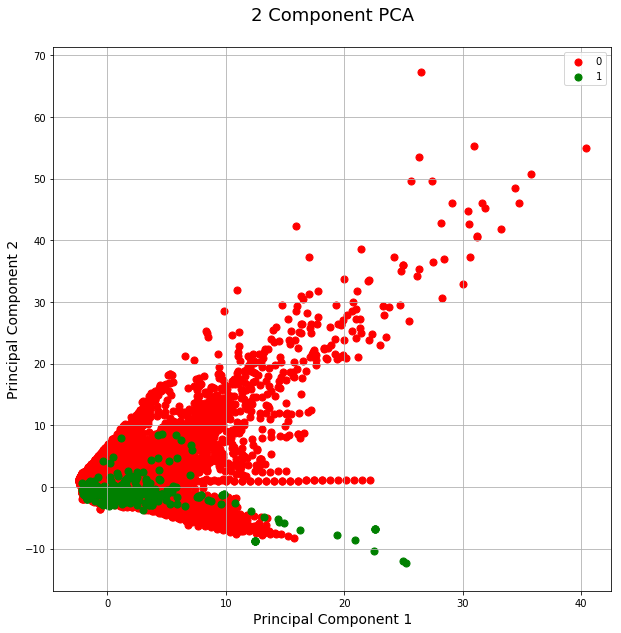

In [8]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 14)
ax.set_ylabel('Principal Component 2', fontsize = 14)
ax.set_title('2 Component PCA\n', fontsize = 18)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
pca.explained_variance_ratio_

array([0.1326868 , 0.09016291])

## Exploratory Data Analysis

In [10]:
df.shape

(182576, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,...,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000,182576.000000
mean,123833.897747,0.144963,0.019021,-0.384128,-0.087033,0.158744,-0.055791,0.064418,-0.033027,0.025306,...,0.017168,0.058131,0.021265,-0.005229,-0.074897,-0.014534,-0.000956,-0.001056,83.466081,0.001605
std,31699.263004,2.002021,1.652431,1.482829,1.445830,1.368147,1.345587,1.246748,1.186355,1.087904,...,0.743890,0.764999,0.621293,0.611299,0.547342,0.475637,0.410016,0.333934,242.109118,0.040028
min,59385.000000,-46.855047,-60.464618,-48.325589,-5.683171,-113.743307,-21.929312,-43.557242,-50.943369,-13.434066,...,-22.889347,-9.499423,-36.666000,-2.807897,-8.696627,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,89112.000000,-0.854475,-0.596986,-1.323174,-0.905995,-0.542786,-0.830124,-0.515518,-0.247462,-0.610375,...,-0.231770,-0.550226,-0.149287,-0.371123,-0.396509,-0.330411,-0.073562,-0.059703,4.990000,0.000000
50%,130169.500000,0.075800,0.060272,-0.350597,-0.156297,0.117594,-0.346612,0.103802,-0.012805,-0.016138,...,-0.007271,0.082798,0.015715,0.028051,-0.106787,-0.040440,-0.003921,-0.011219,20.000000,0.000000
75%,149986.250000,1.897381,0.837211,0.633209,0.556396,0.778318,0.330313,0.658799,0.300972,0.615473,...,0.219289,0.652641,0.189187,0.484303,0.288661,0.219755,0.095904,0.079443,71.700000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,32.911462,73.301626,120.589494,12.766112,15.594995,...,27.202839,8.361985,22.528412,4.584549,7.519589,3.415636,31.612198,22.620072,25691.160000,1.000000


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
df.isnull().values.any()

False

In [14]:
print(df['Class'].value_counts()[0],'NonFraud transactions in total') 
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,4), '% of the dataset \n')
print(df['Class'].value_counts()[1],'Fraud transactions in total') 
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,4), '% of the dataset') 

182283 NonFraud transactions in total
No Frauds 99.8395 % of the dataset 

293 Fraud transactions in total
Frauds 0.1605 % of the dataset


## Anomaly Detection vs Supervised Learning
Based on this initial EDA, this dataset does not have any null values and highly imbalance. According to Andrew NG, Anomaly Detection is best for umbalance dataset and supervised learning is better if dataset balanced. See the picture below

#### 99.8273% of total transaction is Non Fraud
#### 0.1727% of total transaction is Fraud

![alt text](../docs/images/anomaly-vs-supervised.png "Anomaly Detection vs Supervised Learning")

Text(0.5, 0, 'Non Frad vs Fraud')

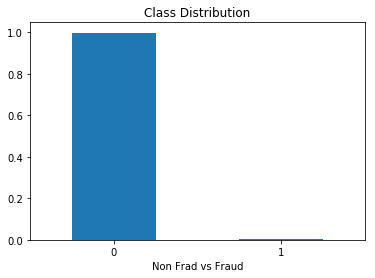

In [15]:
count_classes = pd.value_counts(df['Class'], sort = True, normalize=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ['0','1'])
plt.xlabel("Non Frad vs Fraud")

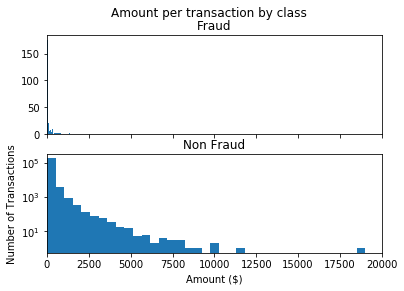

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(df[df['Class']==1].Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(df[df['Class']==0].Amount, bins = bins)
ax2.set_title('Non Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

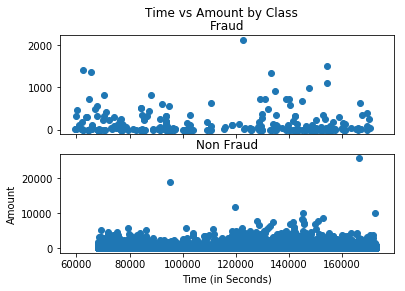

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time vs Amount by Class')

ax1.scatter(df[df['Class']==1].Time, df[df['Class']==1].Amount)
ax1.set_title('Fraud')

ax2.scatter(df[df['Class']==0].Time, df[df['Class']==0].Amount)
ax2.set_title('Non Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

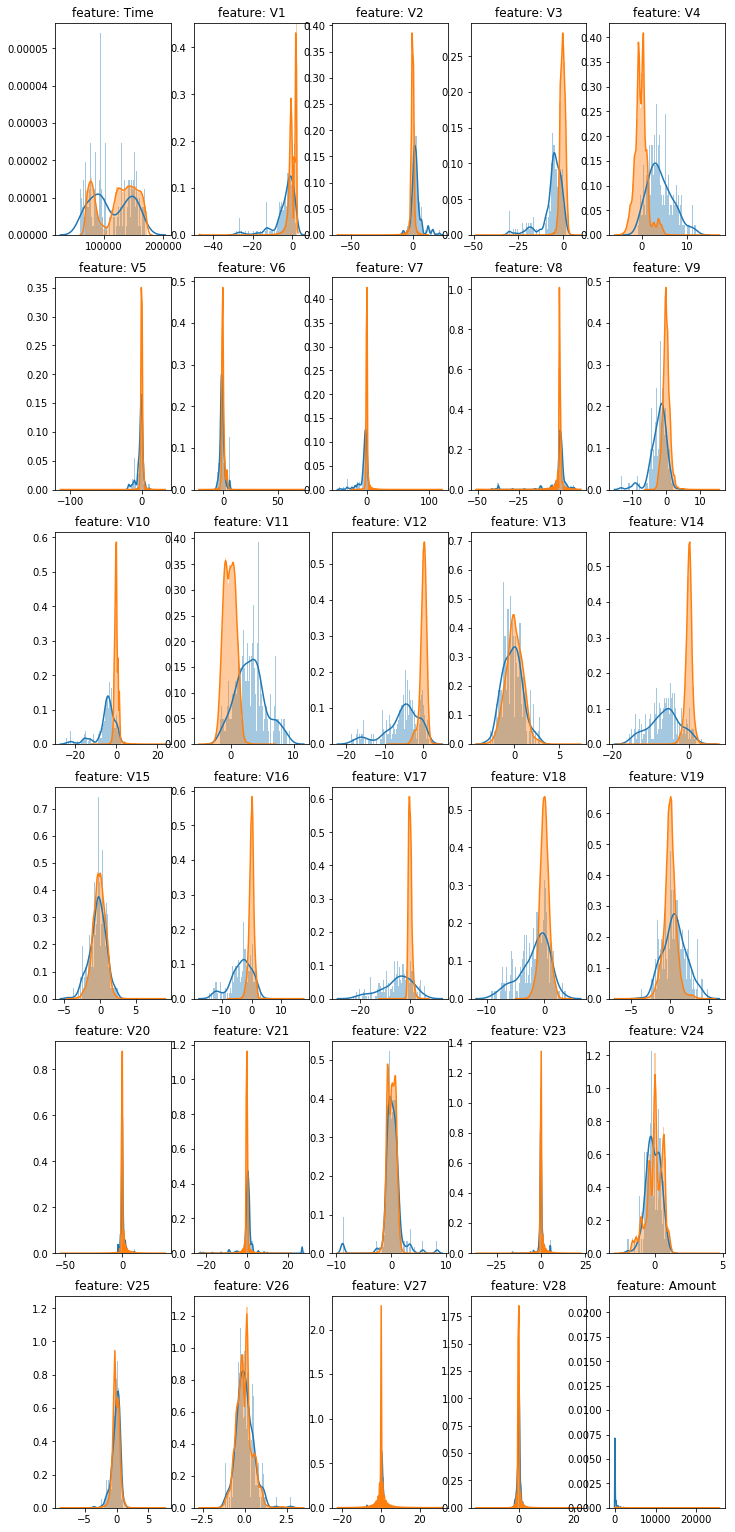

In [18]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 5)
for i, cn in enumerate(df.iloc[:,0:30]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=80)
    sns.distplot(df[cn][df.Class == 0], bins=80)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

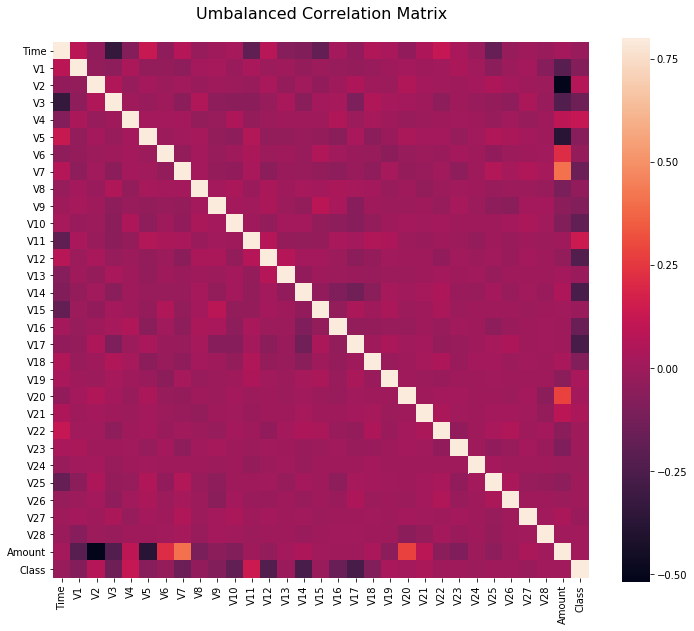

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
ax.set_title("Umbalanced Correlation Matrix\n", fontsize=16)
plt.show()

## Modelling

### 1. Anomaly Detection using Gaussian Distribution
    - According to Andrew Ng, we have to estimate parameters first. (the formulas described above!)
    - Find best Epsilon (based on accuracy)

In [20]:
def estimateGaussian(df):
    """
     This function estimates the parameters of a Gaussian distribution
    """
    mu = np.mean(df, axis=0)
    sigma = np.cov(df.T) # convariance
    return mu, sigma

def multivariateGaussian(dataset, mu, sigma):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    p = multivariate_normal(mean=mu, cov=sigma, allow_singular=True)
    return p.pdf(dataset)

In [21]:
def selectThreshold(probs, gt):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    recall_array = []
    precision_array = []
    f1_array = []
    f1_idx = 0
    idx = 0
    
    # we can change step size manually to improve model's accuracy 
    step = (max(probs) - min(probs))/500
    epsilons = np.arange(probs.min(), probs.max(), step)
    
    # for demistration purposes, going to selected 4 Epsilons, 
    # In Production, we should use previous method, to find out the Best Epsilon
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)

    # check each probability to choose best epsilon
    for ep in epsilons:
        predictions = (probs < ep)
        f1 = f1_score(gt, predictions, average = "binary")
        recall = recall_score(gt, predictions, average = "binary")
        precision = precision_score(gt, predictions, average = "binary")
        
        # collecting in array for visualisation
        f1_array.append(f1)
        recall_array.append(recall)
        precision_array.append(precision)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = ep
            best_recall = recall
            best_precision = precision
            # saving location of best value for visualisation
            f1_idx = idx
        idx+=1
    
    
    print('Calculated based on {} Epsilons'.format(len(epsilons)))
    print('Best epsilon found using cross-validation: {} \n'.format(best_epsilon))
    print('Best F1 on Cross Validation: {}'.format(best_f1))
    print('Best Recall Score: {}'.format(best_recall))
    print('Best Precision Score: {} \n'.format(best_precision))

    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 1, 0.5])
    plt.plot(f1_array[(0 if f1_idx-4 <= 0 else f1_idx-4):f1_idx+5] ,"ro")
    plt.plot(f1_array[(0 if f1_idx-4 <= 0 else f1_idx-4):f1_idx+5])
    ax.set_xticks(range(10))
    ax.set_xticklabels(epsilons[(0 if f1_idx-4 <= 0 else f1_idx-4):f1_idx+5], rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0, 1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon, best_f1), xytext=(best_epsilon, best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    
    return best_f1, best_epsilon

In [22]:
df_v1 = df[df["Class"] == 1]
df_v0 = df[df["Class"] == 0]

In [23]:
# Splitting nonFraid dataset into training: 60%, validation: 20%, testing: 20%
df_train, df_cv_v0, df_test_v0 = np.split(df_v0.sample(frac=1), [int(.6*len(df_v0)), int(.8*len(df_v0))])

# Splitting Fraid dataset into validation: 50%, testing: 50%
df_cv_v1, df_test_v1 = np.split(df_v1.sample(frac=1), [int(.5*len(df_v1))])

df_cv = pd.concat([df_cv_v0,df_cv_v1],axis=0)
df_test = pd.concat([df_test_v0,df_test_v1],axis=0)

In [24]:
print('Training Dataset                :', df_train['Class'].value_counts()[0])
print('Validation Dataset (nonFraud)   :', df_cv['Class'].value_counts()[0])
print('Validation Dataset (Fraud)      :', df_cv['Class'].value_counts()[1])
print('Testing Dataset (nonFraud)      :', df_test['Class'].value_counts()[0])
print('Testing Dataset (Fraud)         :', df_test['Class'].value_counts()[1])

Training Dataset                : 109369
Validation Dataset (nonFraud)   : 36457
Validation Dataset (Fraud)      : 146
Testing Dataset (nonFraud)      : 36457
Testing Dataset (Fraud)         : 147


In [25]:
df_cv_Y = df_cv["Class"]
df_test_Y = df_test["Class"]

df_train.drop(labels = ["Class"], axis = 1, inplace = True)
df_cv.drop(labels = ["Class"], axis = 1, inplace = True)
df_test.drop(labels = ["Class"], axis = 1, inplace = True)

In [26]:
mu, sigma = estimateGaussian(df_train)
p = multivariateGaussian(df_train, mu, sigma)
p_cv = multivariateGaussian(df_cv, mu, sigma)
p_test = multivariateGaussian(df_test, mu, sigma)

Calculated based on 4 Epsilons
Best epsilon found using cross-validation: 1.0527717316e-50 

Best F1 on Cross Validation: 0.10163934426229507
Best Recall Score: 0.21232876712328766
Best Precision Score: 0.0668103448275862 



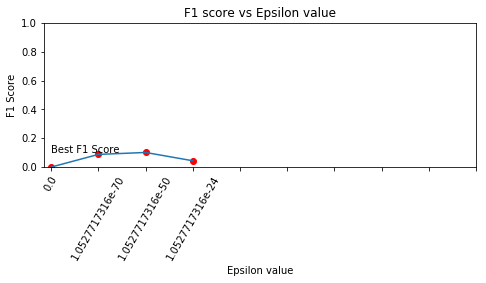

In [27]:
best_f1, ep = selectThreshold(p_cv, df_cv_Y)

In [28]:
predictions = (p_test < ep)
recall = recall_score(df_test_Y, predictions, average = "binary")    
precision = precision_score(df_test_Y, predictions, average = "binary")
F1 = f1_score(df_test_Y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score {}'.format(F1))
print ('Best Recall Score {}'.format(recall))
print ('Best Precision Score {}'.format(precision))

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.1197411003236246
Best Recall Score 0.25170068027210885
Best Precision Score 0.07855626326963906


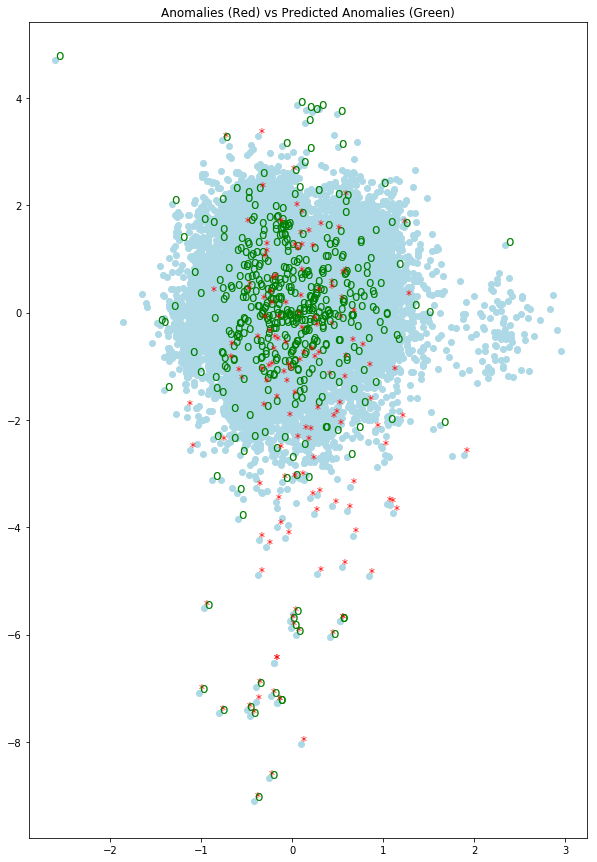

In [29]:
# Randomly choose V26, V18 features to show sample scatter plot, because based on previous feature analysis in EDA,
# these features are the most valid in terms of Gaussian Distribution 

fig, ax = plt.subplots(figsize=(10, 15))
ax.scatter(df_test['V26'], df_test['V18'], marker="o", color="lightBlue")
ax.set_title('Anomalies (Red) vs Predicted Anomalies (Green)')
for i, idx in enumerate(df_test['V26'].index):
    if df_test_Y.loc[idx] == 1:
        ax.annotate('*', (df_test['V26'].loc[idx], df_test['V18'].loc[idx]), fontsize=12,color='Red')
    if predictions[i] == True:
        ax.annotate('o', (df_test['V26'].loc[idx], df_test['V18'].loc[idx]), fontsize=14,color='Green')

### Improving the model
 - Feature Importance

In [30]:
rc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rc.fit(df.iloc[:,0:30], df.iloc[:,30]);

In [31]:
x, y = (list(x) for x in zip(*sorted(zip(rc.feature_importances_, df.iloc[:,0:30].columns), 
                                                            reverse = False)))

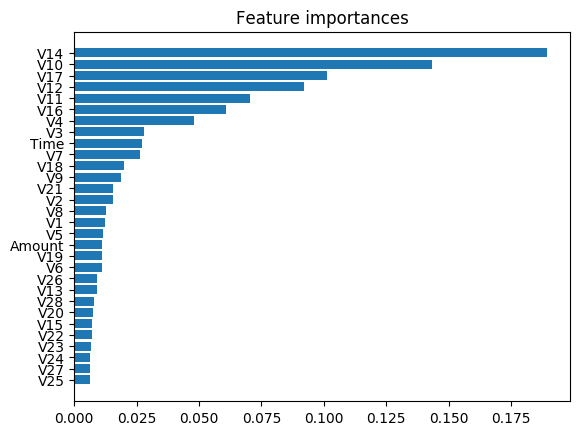

In [32]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y, x)
ax.set_title('Feature importances')
plt.show()

In [33]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
important_features = []
for name, importance in zip(df.iloc[:,0:30].columns, rc.feature_importances_):
    # can choose a number to determine how important these features are
    if importance > 0.020 :
        important_features.append(name)

important_features

['Time', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

In [35]:
df[important_features].head()

,Time,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
0,59385.0,-2.077911,3.416754,-6.578948,-4.001742,2.611762,-2.210691,-5.281678,-2.342178,-4.442082,-0.812202
1,59669.0,-2.007181,2.419675,-2.459530,-3.236784,3.561795,-3.914679,-4.458895,-2.343304,-5.071450,-0.749172
2,59777.0,-5.365307,1.204230,-1.967893,-3.426052,0.144563,-4.283529,-3.657490,0.844221,-3.948312,-1.807516
3,59840.0,-1.261883,3.794949,-5.165141,-3.252634,5.040751,-5.314442,-6.233044,-6.890318,-9.516411,-4.364128
4,60353.0,-1.880372,4.319241,-1.909559,-3.550385,4.838964,-6.040235,-6.221945,-5.073643,-10.441009,-3.755525


In [36]:
df_train_imp = df_train[important_features]
df_cv_imp = df_cv[important_features]
df_test_imp = df_test[important_features]

In [37]:
mu, sigma = estimateGaussian(df_train_imp)
p = multivariateGaussian(df_train_imp, mu, sigma)
p_cv = multivariateGaussian(df_cv_imp, mu, sigma)
p_test = multivariateGaussian(df_test_imp, mu, sigma)

Calculated based on 4 Epsilons
Best epsilon found using cross-validation: 1.0527717316e-24 

Best F1 on Cross Validation: 0.2442748091603053
Best Recall Score: 0.3287671232876712
Best Precision Score: 0.19433198380566802 



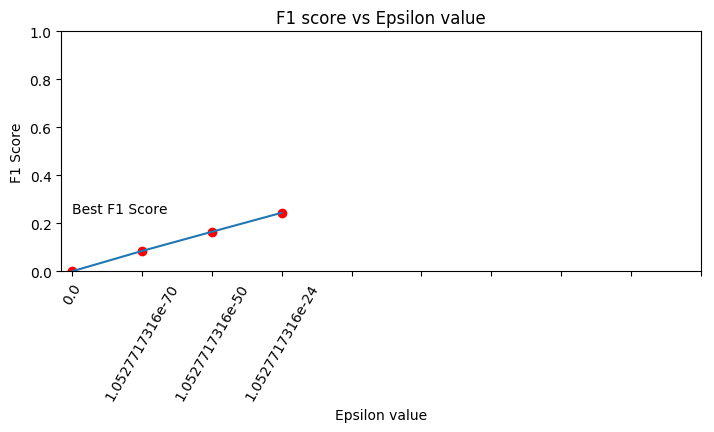

In [38]:
best_f1, ep = selectThreshold(p_cv, df_cv_Y)

In [39]:
predictions = (p_test < ep)
recall = recall_score(df_test_Y, predictions, average = "binary")    
precision = precision_score(df_test_Y, predictions, average = "binary")
F1 = f1_score(df_test_Y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test Dataset')
print ('Best F1 Score {}'.format(F1))
print ('Best Recall Score {}'.format(recall))
print ('Best Precision Score {}'.format(precision))

F1 score , Recall and Precision for Test Dataset
Best F1 Score 0.224390243902439
Best Recall Score 0.3129251700680272
Best Precision Score 0.17490494296577946


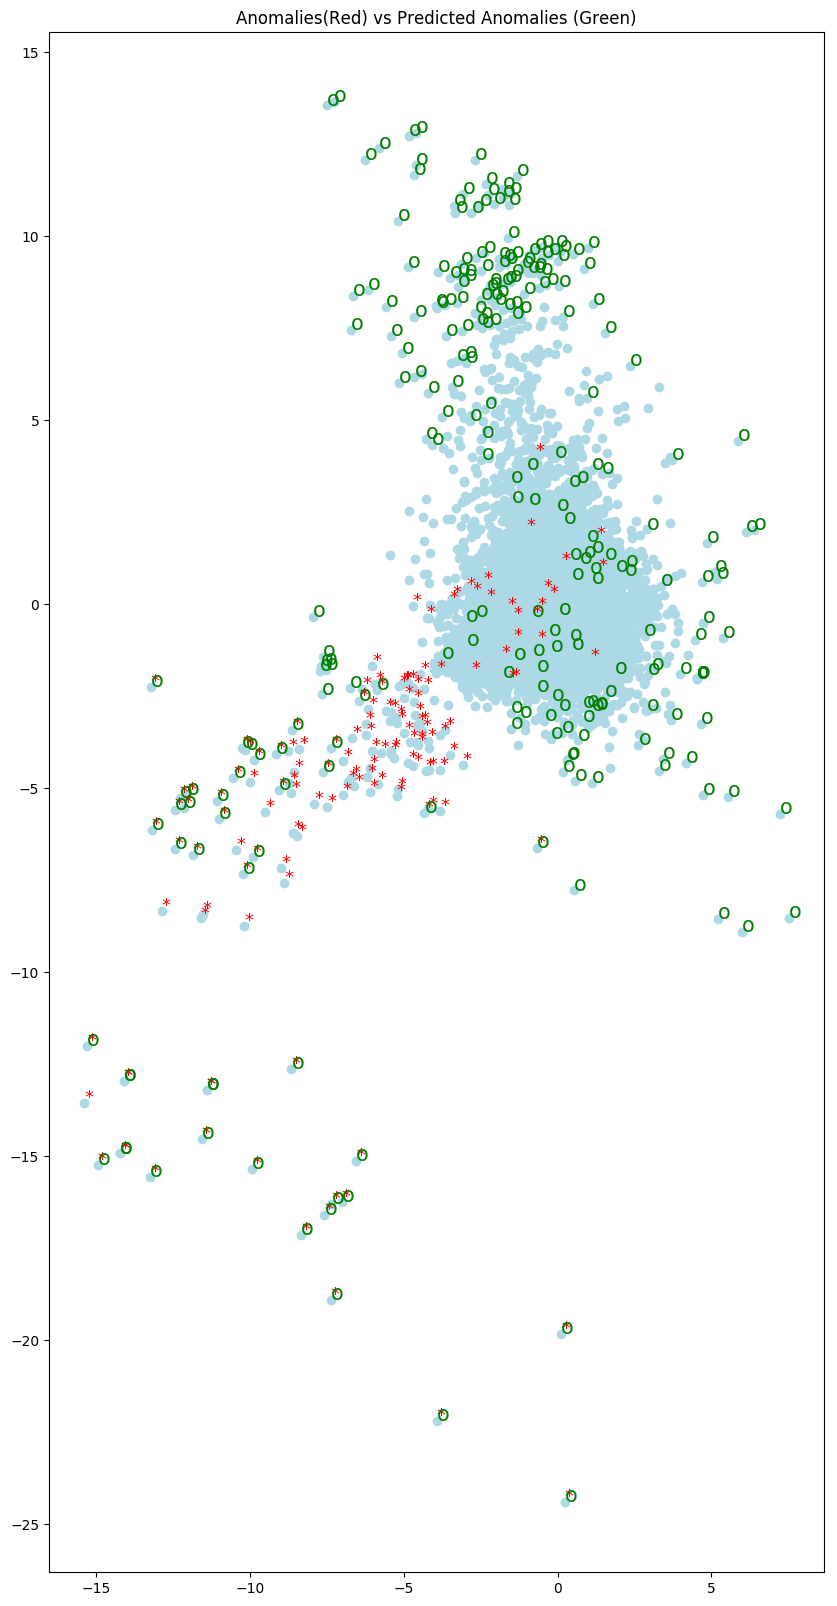

In [40]:
# Randomly choose V14, V10 features to show sample scatter plot, because I assume 
# that V14 and V10 maybe strong and important features

fig, ax = plt.subplots(figsize=(10, 20))
ax.scatter(df_test['V14'], df_test['V10'], marker="o", color="lightBlue")
ax.set_title('Anomalies(Red) vs Predicted Anomalies (Green)')
for i, txt in enumerate(df_test['V14'].index):
    if df_test_Y.loc[txt] == 1:
        ax.annotate('*', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=13, color='Red')
    if predictions[i] == True:
        ax.annotate('o', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=15, color='Green')

Finally, let's import some model scoring libraries. Since, we are dealing with a heavily imbalanced dataset, F1 Score is used as a proxy for model performance.

### IsolationForest Model
unsupervised learning
Isolation Forest,One class SVM and LSTM

In [41]:
from sklearn.ensemble import IsolationForest

In [42]:
model = IsolationForest(n_estimators=100, max_samples=256 , contamination=0.1, \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=2018, verbose=0)

In [43]:
model.fit(df_train)

IsolationForest(behaviour='old', bootstrap=False, contamination=0.1,
        max_features=1, max_samples=256, n_estimators=100, n_jobs=-1,
        random_state=2018, verbose=0)

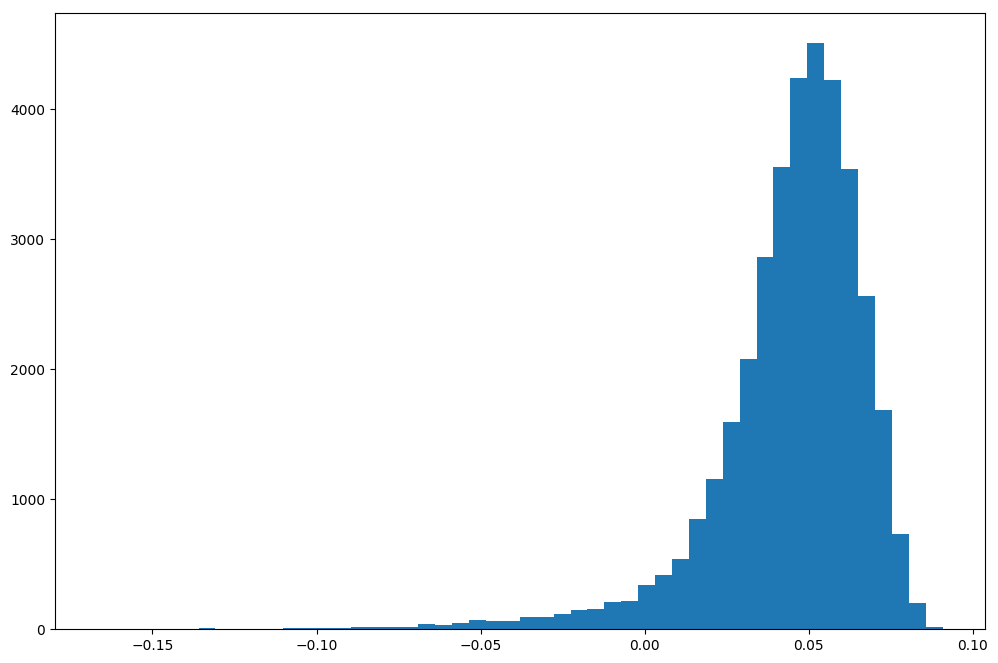

In [44]:
cv_score = model.decision_function(df_cv)
plt.figure(figsize=(12, 8))
plt.hist(cv_score, bins=50);

In [45]:
pred_cv=cv_score.copy()
pred_cv=1-pred_cv
pred_class=pred_cv.copy()
pred_class[pred_cv>=np.percentile(pred_cv,98)]=1
pred_class[pred_cv<np.percentile(pred_cv,98)]=0

print("Validation AUC: {:.1%}".format(roc_auc_score(df_cv_Y, pred_class)))

Validation AUC: 77.2%


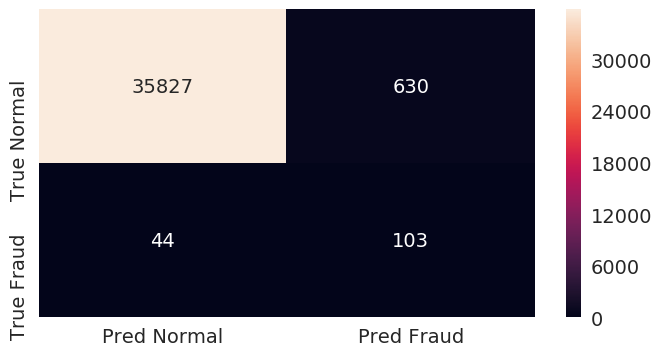

In [46]:
test_score = model.decision_function(df_test)
prediction=test_score.copy()
prediction=1-prediction

prediction_class=prediction.copy()
prediction_class[prediction>=np.percentile(prediction,98)]=1
prediction_class[prediction<np.percentile(prediction,98)]=0

cm = confusion_matrix(df_test_Y, prediction_class)
df_cm = pd.DataFrame(cm,['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])

plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g')

In [47]:
print("Test AUC: {:.1%}".format(roc_auc_score(df_test_Y, prediction_class)))

Test AUC: 84.2%


In [48]:
print("F1 Score: {}".format(f1_score(df_test_Y, prediction_class)))

F1 Score: 0.2340909090909091


In [49]:
print(classification_report(df_test_Y, prediction_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     36457
           1       0.14      0.70      0.23       147

   micro avg       0.98      0.98      0.98     36604
   macro avg       0.57      0.84      0.61     36604
weighted avg       1.00      0.98      0.99     36604



In [50]:
# Accuracy = (Number of elements correctly classified)/(Total elements)
print("Accuracy Score: {:.1%}".format(accuracy_score(df_test_Y,prediction_class)))

Accuracy Score: 98.2%


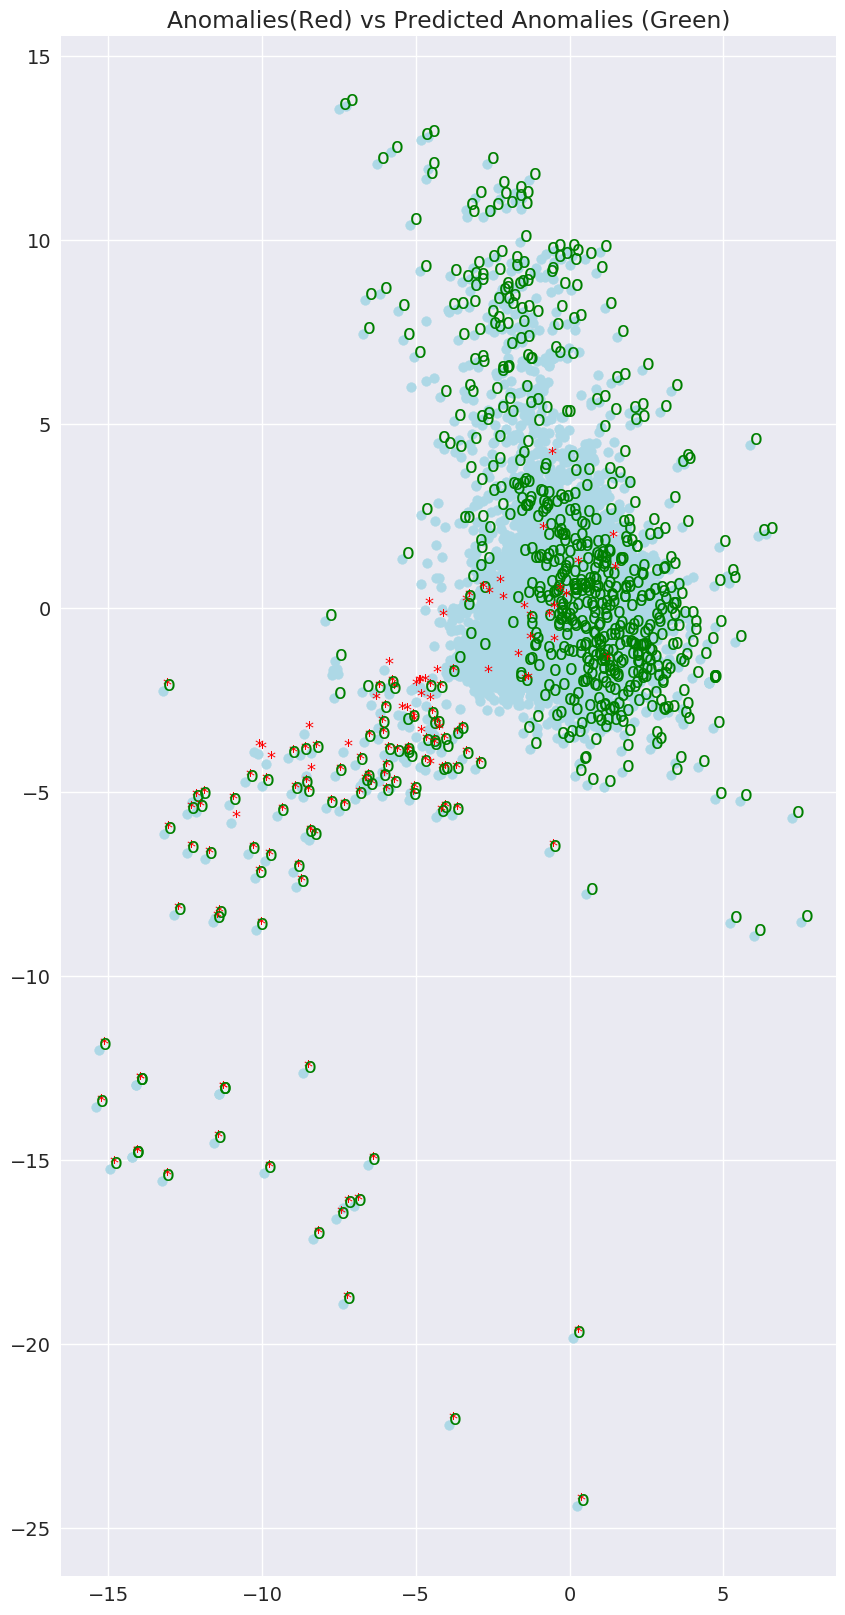

In [51]:
# Same Scatter Plotting on IsolationForest model

fig, ax = plt.subplots(figsize=(10, 20))
ax.scatter(df_test['V14'], df_test['V10'], marker="o", color="lightBlue")
ax.set_title('Anomalies(Red) vs Predicted Anomalies (Green)')
for i, txt in enumerate(df_test['V14'].index):
    if df_test_Y.loc[txt] == 1:
        ax.annotate('*', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=13, color='Red')
    if prediction_class[i] == 1:
        ax.annotate('o', (df_test['V14'].loc[txt], df_test['V10'].loc[txt]), fontsize=15, color='Green')

## Reference

PWC, Global Economic Crime and Fraud Survey, 2018, https://www.pwc.com/gx/en/forensics/global-economic-crime-and-fraud-survey-2018.pdf

Kartik Nighania, Various ways to evaluate a machine learning model’s performance, 30 Dec 2018, 
https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15 

Shruti Saxena, Precision vs Recall, 15 May 2018, https://towardsdatascience.com/precision-vs-recall-386cf9f89488

Fei Tony Liu, 2019, Isolation Forest, https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

In [ ]:
# Try Pipeline